In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leaf-classification/train.csv.zip
/kaggle/input/leaf-classification/sample_submission.csv.zip
/kaggle/input/leaf-classification/images.zip
/kaggle/input/leaf-classification/test.csv.zip


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.layers import Dense, BatchNormalization, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from category_encoders import OneHotEncoder
import matplotlib.pyplot as plt
import os, math
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, classification_report, confusion_matrix

In [3]:
dfTrain = pd.read_csv('/kaggle/input/leaf-classification/train.csv.zip')
dfTrain = dfTrain.iloc[:, 1:]

dfTest = pd.read_csv('/kaggle/input/leaf-classification/test.csv.zip')
dfTest = dfTest.iloc[:, 1:]

In [4]:
dfTrain

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.000000,0.000000,0.004883,0.000000,0.025391
1,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.000000,0.000000,0.000977,0.039062,0.022461
2,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.000000,0.000000,0.000000,0.020508,0.002930
3,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.000000,0.000000,0.017578,0.000000,0.047852
4,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,Magnolia_Salicifolia,0.060547,0.119140,0.007812,0.003906,0.000000,0.148440,0.017578,0.0,0.001953,...,0.242190,0.000000,0.034180,0.000000,0.010742,0.000000,0.000000,0.000000,0.000000,0.018555
986,Acer_Pictum,0.001953,0.003906,0.021484,0.107420,0.001953,0.000000,0.000000,0.0,0.029297,...,0.170900,0.000000,0.018555,0.000000,0.011719,0.000000,0.000000,0.000977,0.000000,0.021484
987,Alnus_Maximowiczii,0.001953,0.003906,0.000000,0.021484,0.078125,0.003906,0.007812,0.0,0.003906,...,0.004883,0.000977,0.004883,0.027344,0.016602,0.007812,0.000000,0.027344,0.000000,0.001953
988,Quercus_Rubra,0.000000,0.000000,0.046875,0.056641,0.009766,0.000000,0.000000,0.0,0.037109,...,0.083008,0.030273,0.000977,0.002930,0.014648,0.000000,0.041992,0.000000,0.001953,0.002930


In [5]:
dfTest

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,0.000000,0.000000,0.003906,0.015625,0.041016,0.000000,0.017578,0.000000,0.005859,0.013672,...,0.098633,0.000000,0.004883,0.000000,0.003906,0.0,0.0,0.018555,0.000000,0.000977
590,0.000000,0.003906,0.003906,0.005859,0.017578,0.000000,0.017578,0.005859,0.000000,0.005859,...,0.012695,0.004883,0.004883,0.002930,0.009766,0.0,0.0,0.090820,0.000000,0.016602
591,0.017578,0.029297,0.015625,0.013672,0.003906,0.015625,0.025391,0.000000,0.000000,0.009766,...,0.073242,0.000000,0.028320,0.000000,0.001953,0.0,0.0,0.000000,0.042969,0.006836
592,0.013672,0.009766,0.060547,0.025391,0.035156,0.025391,0.039062,0.000000,0.003906,0.023438,...,0.003906,0.000000,0.000977,0.000000,0.011719,0.0,0.0,0.000000,0.011719,0.018555


In [6]:
len(dfTrain.species.unique())

99

In [7]:
def create_data(dfTrain):
    target = {k: v for k, v in zip(dfTrain.species.unique(), list(range(len(dfTrain.species.unique()))))}
    X = np.array(dfTrain.drop(['species'], axis=1))
    y = np.asarray(dfTrain['species'].map(target)).astype('int64')
    
    X = tf.cast(X, tf.float64)
    y = tf.cast(y, tf.int64)
    return X, y


X, y = create_data(dfTrain)

In [8]:
print(X.shape, y.shape)

(990, 192) (990,)


In [9]:
def GELU(x):
    res = 0.5 * x * (1 + tf.nn.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * (x ** 3))))
    return res


class ResMLPBlock(tf.keras.layers.Layer):
    def __init__(self, units, residual_path):
        super(ResMLPBlock, self).__init__()
        self.residual_path = residual_path
        self.D1 = Dense(units, activation='tanh')
        self.D2 = Dense(units, activation='tanh')

        if self.residual_path:
            self.D3 = Dense(units)
            self.D4 = Dense(units)

    def call(self, inputs):
        residual = inputs

        x = self.D1(inputs)
        y = self.D2(x)

        if self.residual_path:
            residual = self.D3(inputs)
            residual = GELU(residual)
            residual = self.D4(residual)
            residual = GELU(residual)

        output = y + residual
        return output

In [10]:
class ResMLP(tf.keras.Model):
    def __init__(self, initial_filters, block_list, num_classes):
        super(ResMLP, self).__init__()
        self.initial_filters = initial_filters
        self.block_list = block_list

        self.D1 = Dense(self.initial_filters, activation='tanh')
        self.B1 = BatchNormalization()

        self.blocks = tf.keras.models.Sequential()
        for block_id in range(len(block_list)):
            for layer_id in range(block_list[block_id]):
                if block_id != 0 and layer_id == 0:
                    block = ResMLPBlock(units=self.initial_filters, residual_path=True)
                else:
                    block = ResMLPBlock(units=self.initial_filters, residual_path=False)
                self.blocks.add(block)
            self.initial_filters *= 2
        self.D2 = Dense(num_classes, activation='softmax')


    def call(self, inputs):
        x = self.D1(inputs)
        x = self.B1(x)
        x = self.blocks(x)
        y = self.D2(x)
        return y

In [11]:
net = ResMLP(initial_filters=128, block_list=[2, 2, 2], num_classes=99)

net.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
            metrics=['sparse_categorical_accuracy'])

history = net.fit(X, y, epochs=200, batch_size=32, validation_split=0.3)

net.summary()

Epoch 1/200
22/22 [==============================] - 4s 41ms/step - loss: 2.9589 - sparse_categorical_accuracy: 0.3608 - val_loss: 3.6367 - val_sparse_categorical_accuracy: 0.1347
Epoch 2/200
22/22 [==============================] - 0s 20ms/step - loss: 0.8125 - sparse_categorical_accuracy: 0.7662 - val_loss: 2.9342 - val_sparse_categorical_accuracy: 0.2525
Epoch 3/200
22/22 [==============================] - 0s 20ms/step - loss: 0.4784 - sparse_categorical_accuracy: 0.8658 - val_loss: 2.4096 - val_sparse_categorical_accuracy: 0.3906
Epoch 4/200
22/22 [==============================] - 0s 19ms/step - loss: 0.3361 - sparse_categorical_accuracy: 0.8975 - val_loss: 2.1105 - val_sparse_categorical_accuracy: 0.4714
Epoch 5/200
22/22 [==============================] - 0s 21ms/step - loss: 0.3990 - sparse_categorical_accuracy: 0.8975 - val_loss: 2.9515 - val_sparse_categorical_accuracy: 0.2761
Epoch 6/200
22/22 [==============================] - 0s 20ms/step - loss: 0.3594 - sparse_categorica

In [12]:
dfSub = pd.read_csv('/kaggle/input/leaf-classification/sample_submission.csv.zip')
dfSub

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
1,7,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
2,9,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
3,12,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
4,13,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
590,1577,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
591,1579,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
592,1580,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101


In [13]:
X_test = np.array(dfTest)
y_pred = net.predict(X_test)

In [14]:
dfNew = pd.DataFrame(y_pred, columns=dfSub.columns.tolist()[1:])
dfNew

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,3.713839e-15,6.231607e-12,5.309198e-14,9.389763e-17,3.722686e-13,4.278171e-13,2.582016e-16,4.027555e-14,3.182822e-17,1.630475e-12,...,3.191227e-14,4.942000e-18,6.065521e-12,2.123202e-14,4.739244e-17,1.958360e-17,4.018413e-19,4.812963e-15,4.817169e-15,9.358633e-10
1,2.353029e-11,6.437784e-19,9.694093e-19,1.075798e-15,1.690837e-13,6.724338e-18,3.233869e-15,2.644709e-15,1.014853e-15,8.899096e-18,...,8.591616e-16,2.053925e-16,2.923310e-13,6.751822e-16,3.468109e-17,1.562020e-16,7.943050e-20,9.681791e-18,5.641460e-18,2.378708e-16
2,5.605186e-18,6.849623e-16,1.356480e-16,2.682505e-16,1.139072e-13,1.492754e-12,1.039617e-11,2.427161e-15,1.167742e-14,5.652273e-18,...,2.147934e-16,1.637362e-17,2.516731e-17,3.465855e-12,3.655989e-09,1.619083e-17,2.869204e-16,3.950116e-15,6.077095e-16,5.257659e-17
3,1.076132e-22,1.035249e-23,2.987009e-18,1.107697e-18,7.628227e-20,1.565773e-18,6.395463e-14,7.756806e-14,4.737847e-20,7.395836e-22,...,6.351717e-16,3.440802e-21,4.438564e-12,2.288527e-16,9.034639e-01,1.100909e-14,1.534288e-17,1.451041e-15,2.752051e-14,2.119814e-16
4,8.011323e-10,3.708468e-10,6.983944e-15,8.405585e-10,2.152228e-11,1.449286e-12,3.057562e-14,5.641065e-11,2.214368e-10,3.604166e-07,...,1.448397e-06,2.095896e-12,4.419326e-08,1.067604e-11,9.140217e-10,6.123266e-09,3.546300e-10,2.886716e-13,1.930269e-13,6.627409e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1.615174e-22,2.045079e-20,1.036190e-19,5.327448e-19,9.113270e-16,7.735449e-17,7.621724e-14,3.735553e-19,1.590410e-18,1.002372e-22,...,3.757372e-21,1.898181e-22,1.912216e-21,4.084235e-16,1.215494e-11,7.375995e-21,4.076211e-20,2.516836e-18,8.883557e-19,2.570275e-20
590,1.489027e-19,3.608736e-19,1.136312e-16,1.545859e-18,2.818373e-22,1.522395e-22,6.491013e-15,1.623626e-21,2.202270e-17,1.525969e-16,...,6.171175e-22,1.070674e-19,3.099469e-20,1.123194e-15,1.042926e-16,1.013919e-18,1.512269e-14,5.675051e-16,1.684531e-17,1.236963e-13
591,1.083337e-13,4.284279e-14,1.457983e-11,2.316484e-16,7.300753e-15,5.459504e-09,9.999977e-01,1.598843e-11,3.398104e-09,3.175889e-15,...,3.015257e-15,3.743800e-10,1.357054e-12,1.161297e-11,4.699038e-10,6.080670e-14,1.101400e-08,1.916398e-11,1.866822e-10,4.745163e-13
592,6.191100e-22,3.304208e-10,1.099662e-19,1.233445e-17,1.286995e-14,7.446430e-18,2.372340e-22,6.437303e-16,3.768804e-18,2.934650e-14,...,1.496486e-12,6.109065e-20,6.909564e-16,3.314598e-17,8.091194e-19,1.166400e-16,3.242811e-16,3.932433e-16,4.786407e-16,7.222663e-20


In [15]:
dfMerge = pd.concat([dfSub['id'], dfNew], axis=1)
dfMerge

,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,3.713839e-15,6.231607e-12,5.309198e-14,9.389763e-17,3.722686e-13,4.278171e-13,2.582016e-16,4.027555e-14,3.182822e-17,...,3.191227e-14,4.942000e-18,6.065521e-12,2.123202e-14,4.739244e-17,1.958360e-17,4.018413e-19,4.812963e-15,4.817169e-15,9.358633e-10
1,7,2.353029e-11,6.437784e-19,9.694093e-19,1.075798e-15,1.690837e-13,6.724338e-18,3.233869e-15,2.644709e-15,1.014853e-15,...,8.591616e-16,2.053925e-16,2.923310e-13,6.751822e-16,3.468109e-17,1.562020e-16,7.943050e-20,9.681791e-18,5.641460e-18,2.378708e-16
2,9,5.605186e-18,6.849623e-16,1.356480e-16,2.682505e-16,1.139072e-13,1.492754e-12,1.039617e-11,2.427161e-15,1.167742e-14,...,2.147934e-16,1.637362e-17,2.516731e-17,3.465855e-12,3.655989e-09,1.619083e-17,2.869204e-16,3.950116e-15,6.077095e-16,5.257659e-17
3,12,1.076132e-22,1.035249e-23,2.987009e-18,1.107697e-18,7.628227e-20,1.565773e-18,6.395463e-14,7.756806e-14,4.737847e-20,...,6.351717e-16,3.440802e-21,4.438564e-12,2.288527e-16,9.034639e-01,1.100909e-14,1.534288e-17,1.451041e-15,2.752051e-14,2.119814e-16
4,13,8.011323e-10,3.708468e-10,6.983944e-15,8.405585e-10,2.152228e-11,1.449286e-12,3.057562e-14,5.641065e-11,2.214368e-10,...,1.448397e-06,2.095896e-12,4.419326e-08,1.067604e-11,9.140217e-10,6.123266e-09,3.546300e-10,2.886716e-13,1.930269e-13,6.627409e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,1.615174e-22,2.045079e-20,1.036190e-19,5.327448e-19,9.113270e-16,7.735449e-17,7.621724e-14,3.735553e-19,1.590410e-18,...,3.757372e-21,1.898181e-22,1.912216e-21,4.084235e-16,1.215494e-11,7.375995e-21,4.076211e-20,2.516836e-18,8.883557e-19,2.570275e-20
590,1577,1.489027e-19,3.608736e-19,1.136312e-16,1.545859e-18,2.818373e-22,1.522395e-22,6.491013e-15,1.623626e-21,2.202270e-17,...,6.171175e-22,1.070674e-19,3.099469e-20,1.123194e-15,1.042926e-16,1.013919e-18,1.512269e-14,5.675051e-16,1.684531e-17,1.236963e-13
591,1579,1.083337e-13,4.284279e-14,1.457983e-11,2.316484e-16,7.300753e-15,5.459504e-09,9.999977e-01,1.598843e-11,3.398104e-09,...,3.015257e-15,3.743800e-10,1.357054e-12,1.161297e-11,4.699038e-10,6.080670e-14,1.101400e-08,1.916398e-11,1.866822e-10,4.745163e-13
592,1580,6.191100e-22,3.304208e-10,1.099662e-19,1.233445e-17,1.286995e-14,7.446430e-18,2.372340e-22,6.437303e-16,3.768804e-18,...,1.496486e-12,6.109065e-20,6.909564e-16,3.314598e-17,8.091194e-19,1.166400e-16,3.242811e-16,3.932433e-16,4.786407e-16,7.222663e-20


In [16]:
dfMerge.to_csv('./dfForSub.csv', index=False)

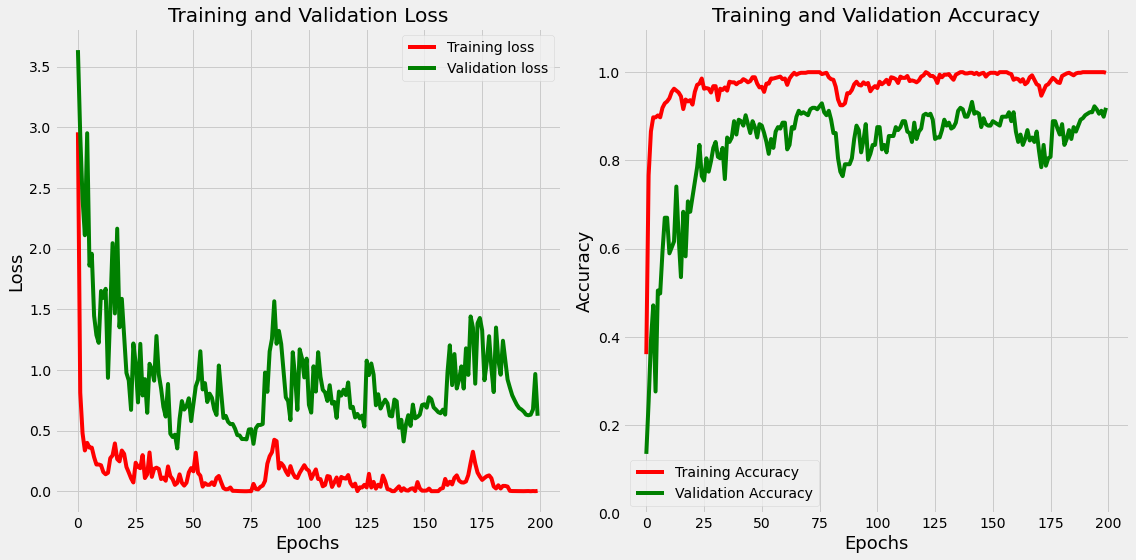

In [17]:
def plot_auc_acc_loss(history, epochs):
    tacc = history.history['sparse_categorical_accuracy']
    tloss = history.history['loss']

    vacc = history.history['val_sparse_categorical_accuracy']
    vloss = history.history['val_loss']

    Epochs = [i for i in range(epochs)]

    plt.style.use('fivethirtyeight')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    axes[0].plot(Epochs, tloss, 'r', label='Training loss')
    axes[0].plot(Epochs, vloss, 'g', label='Validation loss')
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs', fontsize=18)
    axes[0].set_ylabel('Loss', fontsize=18)
    axes[0].legend()

    axes[1].plot(Epochs, tacc, 'r', label='Training Accuracy')
    axes[1].plot(Epochs, vacc, 'g', label='Validation Accuracy')
    axes[1].set_ylim(0, 1.1)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs', fontsize=18)
    axes[1].set_ylabel('Accuracy', fontsize=18)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    return Epochs

Epochs = plot_auc_acc_loss(history, epochs=200)

In [18]:
net.save('my_Leaf.h5')

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.